# Ames, Iowa Housing Project
## Notebook 01 - Preprocessing

In [1]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams.update({'font.size': 12})

## Load Data

In [2]:
housing_df = pd.read_pickle('../data/housing_df.pkl')

In [3]:
with open('../data/cat_columns.pkl', 'rb') as f:
    cat_columns = pickle.load(f)

## 1. Preprocessing

### A. Identify and Remove Outliers from ```saleprice```

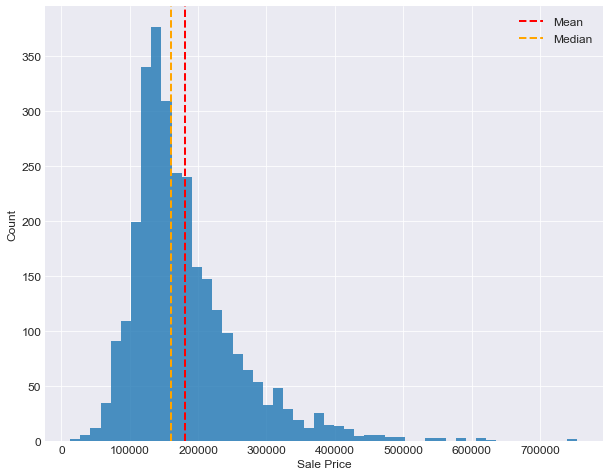

In [4]:
housing_df['saleprice'].hist(bins=50, alpha=0.8)
plt.axvline(housing_df['saleprice'].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(housing_df['saleprice'].median(), color='orange', linestyle='dashed', linewidth=2, label='Median')
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.legend()
plt.show()

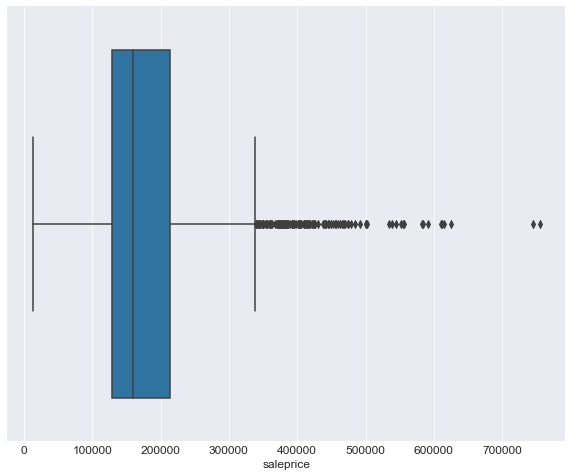

In [5]:
sns.boxplot(housing_df['saleprice'], orient='h')
plt.show()

In [6]:
housing_df['saleprice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: saleprice, dtype: float64

In [7]:
# Create function to reject outliers, default stdev is 1.5
def reject_outliers(data, m=1.5):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

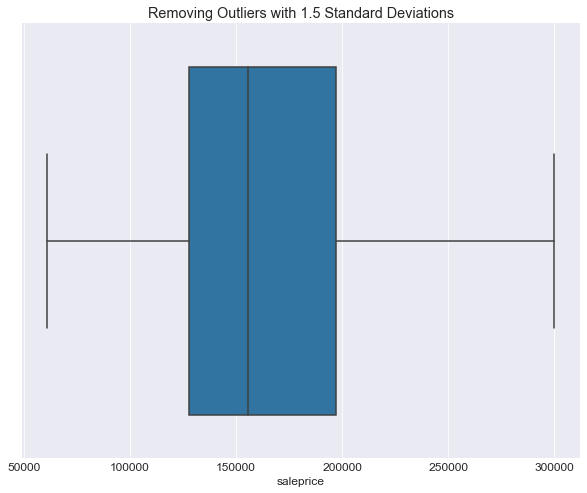

In [8]:
# Box plot showing the outliers gone away with m=1.5
sns.boxplot(reject_outliers(housing_df['saleprice']),
            orient='h').set_title('Removing Outliers with 1.5 Standard Deviations')
plt.show()

In [9]:
# Make series of mask
mask = reject_outliers(housing_df['saleprice']).tolist()
mask[0:20]

[215000,
 105000,
 172000,
 244000,
 189900,
 195500,
 213500,
 191500,
 236500,
 189000,
 175900,
 185000,
 180400,
 171500,
 212000,
 164000,
 141000,
 210000,
 190000,
 170000]

In [10]:
# Mask as Boolean
mask_results = housing_df['saleprice'].isin(mask)[0:20].tolist()
mask_results

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True]

In [11]:
outliers_dict = dict(zip(mask, mask_results))
outliers_dict

{105000: True,
 141000: True,
 164000: False,
 170000: True,
 171500: True,
 172000: True,
 175900: True,
 180400: True,
 185000: True,
 189000: True,
 189900: True,
 190000: True,
 191500: True,
 195500: True,
 210000: False,
 212000: True,
 213500: True,
 215000: True,
 236500: True,
 244000: True}

In [12]:
# New dataframe based off mask
housing_df = housing_df[~housing_df['saleprice'].isin(mask) == False]
housing_df.head(20)

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500


In [13]:
# Prince new 'saleprice' stat data
housing_df['saleprice'].describe()

count      2673.000000
mean     165117.181444
std       51751.938795
min       61000.000000
25%      128000.000000
50%      155500.000000
75%      197000.000000
max      300000.000000
Name: saleprice, dtype: float64

### B. Fill Missing Data

In [14]:
# Columns with null (np.nan) values
nan_col_list = housing_df.columns[housing_df.isnull().any()].tolist()
nan_col_list

['lot_frontage',
 'alley',
 'mas_vnr_type',
 'mas_vnr_area',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_sf_1',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'electrical',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'fireplace_qu',
 'garage_type',
 'garage_yr_blt',
 'garage_finish',
 'garage_cars',
 'garage_area',
 'garage_qual',
 'garage_cond',
 'pool_qc',
 'fence',
 'misc_feature']

In [15]:
# Sum of nan values of each column
nulls = housing_df[nan_col_list].isnull().sum()
nulls

lot_frontage       471
alley             2482
mas_vnr_type        19
mas_vnr_area        19
bsmt_qual           74
bsmt_cond           74
bsmt_exposure       77
bsmtfin_type_1      74
bsmtfin_sf_1         1
bsmtfin_type_2      75
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
electrical           1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu      1390
garage_type        145
garage_yr_blt      147
garage_finish      147
garage_cars          1
garage_area          1
garage_qual        147
garage_cond        147
pool_qc           2663
fence             2115
misc_feature      2569
dtype: int64

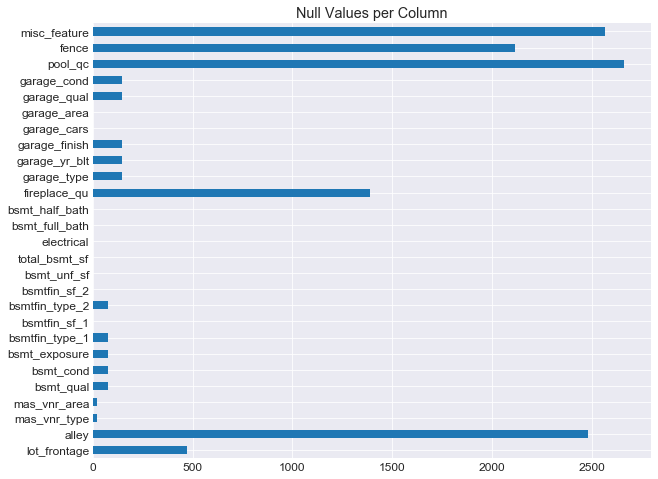

In [16]:
nulls.plot(kind='barh', title='Null Values per Column')
plt.show()

In [17]:
# Find how many missing values and percentage missing in each column
# This gives me an idea of priority
print('Missing data in each dataframe column:')
for col in housing_df.columns:
    missing_data = len(housing_df) - housing_df[col].count()
    if (missing_data > 0 or missing_data =='NaN'):
         print(col, ':', missing_data, 'missing values is', str(round(float(missing_data / float(len(housing_df))) * 
             100, 3)), '% of total')

Missing data in each dataframe column:
lot_frontage : 471 missing values is 17.621 % of total
alley : 2482 missing values is 92.854 % of total
mas_vnr_type : 19 missing values is 0.711 % of total
mas_vnr_area : 19 missing values is 0.711 % of total
bsmt_qual : 74 missing values is 2.768 % of total
bsmt_cond : 74 missing values is 2.768 % of total
bsmt_exposure : 77 missing values is 2.881 % of total
bsmtfin_type_1 : 74 missing values is 2.768 % of total
bsmtfin_sf_1 : 1 missing values is 0.037 % of total
bsmtfin_type_2 : 75 missing values is 2.806 % of total
bsmtfin_sf_2 : 1 missing values is 0.037 % of total
bsmt_unf_sf : 1 missing values is 0.037 % of total
total_bsmt_sf : 1 missing values is 0.037 % of total
electrical : 1 missing values is 0.037 % of total
bsmt_full_bath : 2 missing values is 0.075 % of total
bsmt_half_bath : 2 missing values is 0.075 % of total
fireplace_qu : 1390 missing values is 52.001 % of total
garage_type : 145 missing values is 5.425 % of total
garage_yr_bl

In [18]:
# Build a list of colums where NaN should be a string 'NA'
col_na = ['misc_feature',
          'fence',
          'pool_qc',
          'garage_cond',
          'garage_qual',
          'garage_finish',
          'garage_type',
          'fireplace_qu',
          'bsmtfin_type_1',
          'bsmtfin_type_2',
          'bsmt_exposure',
          'alley']

In [19]:
housing_df[col_na] = housing_df[col_na].fillna('NA')
print(housing_df.shape)
housing_df.head()

(2673, 81)


,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900


That gets rid of all the NaN values associated with pandas importing the 'NA' string as NaN

In [20]:
# Function to make random distribution based on existing data
def make_randoms(df, col):
    return np.random.normal(df[col].mean(),
                            scale=df[col].std(),
                            size=df[col].isnull().sum()).astype(int)

In [21]:
# Use random number generator to create a series of numbers based on 'garage_yr_blt' statistics
garage_yr_blt_rand = make_randoms(housing_df,'garage_yr_blt')
garage_yr_blt_rand

array([1980, 1958, 1966, 1988, 2006, 1936, 1986, 1920, 1968, 2003, 1961,
       2024, 1923, 1980, 2017, 1904, 1999, 1989, 2020, 1964, 1997, 2026,
       1950, 1953, 1973, 1937, 1961, 1976, 1985, 1945, 1967, 1948, 1946,
       1970, 1962, 1996, 2004, 1954, 1951, 1957, 1962, 2039, 1938, 1969,
       1972, 1978, 1954, 1986, 1956, 2003, 1980, 2007, 1984, 2034, 1997,
       1964, 1968, 1989, 1961, 1947, 1979, 1998, 1940, 1951, 2008, 1956,
       1998, 2011, 1966, 1998, 1976, 1974, 1968, 1939, 1957, 1966, 1973,
       2010, 1958, 2000, 1964, 1925, 1969, 1979, 2044, 2015, 1964, 1973,
       2000, 2005, 1992, 2007, 1955, 1967, 1928, 1976, 1940, 1970, 1961,
       1971, 1970, 1963, 1988, 1980, 1968, 1992, 1985, 2005, 1969, 1958,
       1982, 1968, 1986, 2005, 1939, 1978, 1974, 1941, 1962, 1957, 1949,
       1966, 1948, 1980, 1968, 1954, 1964, 1952, 1987, 1944, 1925, 1974,
       1965, 2003, 1990, 1959, 1966, 1978, 1996, 1941, 1951, 1987, 1993,
       1976, 1975, 1963, 1976])

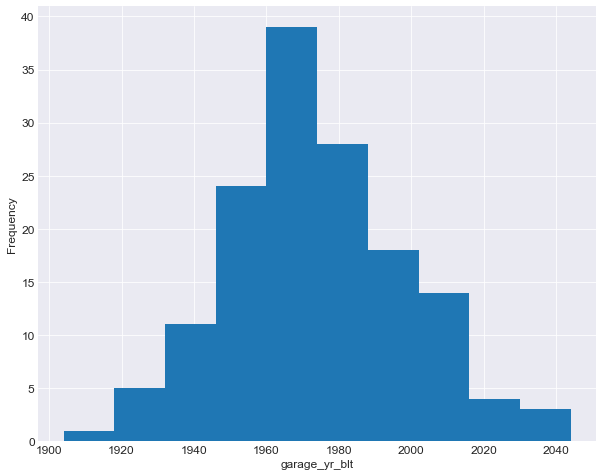

In [22]:
# Plot the random distribution of the 'garage_yr_blt' column
plt.hist(garage_yr_blt_rand)
plt.xlabel('garage_yr_blt')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Use random number generator to create a series of numbers based on 'LotFrontage' statistics
lot_frontage_rand = make_randoms(housing_df,'lot_frontage')
lot_frontage_rand

array([ 49,  84,  62,  57,  70, 113,  54,  48,  84,  65,  43,  47,  54,
       105,  23,  70,  39, 109,  75,  51,  78,  92,  57,  77,  83,  55,
       104,  67,  83,  39,  55,  67, 100,  66,  67,  78,  69,  60,  62,
        53,  77,  47,  95, 124,  38,  61,  96,  63,  78,  86,  72,  76,
        87, 106, 104,  58,  29,  27,  72,  85,  88,  69,  82,  60,  48,
        79,  66,  67,  69, 113,  92,  75,  76,  96,  82,  81,  72, 102,
        62,  51, 112,  62,  67, 128, 123,  91,  51,  86,  47,  38,  84,
        50,  20,  56,  91,  49,  51,  49,  42,  33,  90,  18,  57,  65,
        27,  59,  50,  53,  22,  58,  81,  40,  34, 107,  35,  36,  92,
        94,  54,  30,  85,  75, 143,  69,  66,  77,  88,  61,  65,  95,
        51, 101,  71,  69,  81,  42,  62,  55,  66,  86,  84,  49,  75,
        50,  69,  74,  45,  71,  25,  47, 103,  82,  97,  80,  54,  75,
        68,  69,  57, 134,  86,  46,  68,  69,  51,  78,  61,  73,  71,
        36,  72,  55, 112,  98,  43,  54,  65,  77,  52, 124,  5

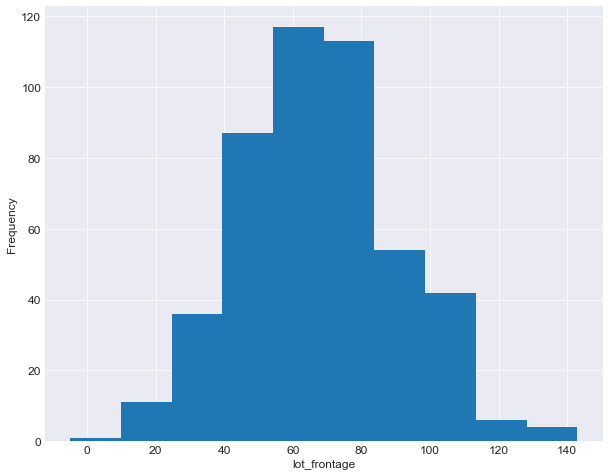

In [24]:
# Plot the random distribution of the 'LotFrontage' column
plt.hist(lot_frontage_rand)
plt.xlabel('lot_frontage')
plt.ylabel('Frequency')
plt.show()

In [25]:
# Replace the NaNs with teh random data using this method because I don't
# have enough fucking time to find a more efficient method
housing_df['lot_frontage'] = housing_df['lot_frontage'].fillna('9999')
housing_df['garage_yr_blt'] = housing_df['garage_yr_blt'].fillna('9999')
housing_df.loc[housing_df['lot_frontage']=='9999','lot_frontage'] = lot_frontage_rand
housing_df.loc[housing_df['garage_yr_blt']=='9999','garage_yr_blt'] = garage_yr_blt_rand

In [26]:
# Drop the rest
print('Before: ', housing_df.shape)
housing_df = housing_df.dropna()
print('After: ', housing_df.shape)

Before:  (2673, 81)
After:  (2578, 81)


In [27]:
# Verify that all null values are gone
nan_col_list = housing_df.columns[housing_df.isnull().any()].tolist()
nan_col_list

[]

In [28]:
nan_col_list = housing_df.columns[housing_df.isnull().any()].tolist()
nulls = housing_df[nan_col_list].isnull().sum()
nulls

Series([], dtype: float64)

### C. Create Dummy Variables for Categorical Columns

In [29]:
housing_df.head(20)

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141,31770,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,...,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81,14267,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93,11160,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74,13830,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900
6,527105030,60,RL,78,9978,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,6,2010,WD,Normal,195500
7,527127150,120,RL,41,4920,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,4,2010,WD,Normal,213500
8,527145080,120,RL,43,5005,Pave,NA,IR1,HLS,AllPub,...,0,NA,NA,NA,0,1,2010,WD,Normal,191500
9,527146030,120,RL,39,5389,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,3,2010,WD,Normal,236500


In [30]:
# Re-index housing_df so indices match 
housing_df.reset_index(inplace=True)
housing_df.head(20)

,order,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
0,1,526301100,20,RL,141,31770,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80,11622,Pave,NA,Reg,Lvl,...,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81,14267,Pave,NA,IR1,Lvl,...,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93,11160,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74,13830,Pave,NA,IR1,Lvl,...,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78,9978,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41,4920,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43,5005,Pave,NA,IR1,HLS,...,0,NA,NA,NA,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39,5389,Pave,NA,IR1,Lvl,...,0,NA,NA,NA,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60,7500,Pave,NA,Reg,Lvl,...,0,NA,NA,NA,0,6,2010,WD,Normal,189000


In [31]:
dummies_df = pd.get_dummies(housing_df[cat_columns],prefix_sep='_',drop_first=False)
print(dummies_df.shape)
dummies_df.head(20)

(2578, 287)


,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_subclass_20,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,...,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,sale_condition_Abnorml,sale_condition_AdjLand,sale_condition_Alloca,sale_condition_Family,sale_condition_Normal,sale_condition_Partial
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [32]:
housing_df = pd.concat([housing_df, dummies_df], axis=1)
print(housing_df.shape)
housing_df.head(20)

(2578, 369)


,order,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,sale_condition_Abnorml,sale_condition_AdjLand,sale_condition_Alloca,sale_condition_Family,sale_condition_Normal,sale_condition_Partial
0,1,526301100,20,RL,141,31770,Pave,NA,IR1,Lvl,...,0,0,0,1,0,0,0,0,1,0
1,2,526350040,20,RH,80,11622,Pave,NA,Reg,Lvl,...,0,0,0,1,0,0,0,0,1,0
2,3,526351010,20,RL,81,14267,Pave,NA,IR1,Lvl,...,0,0,0,1,0,0,0,0,1,0
3,4,526353030,20,RL,93,11160,Pave,NA,Reg,Lvl,...,0,0,0,1,0,0,0,0,1,0
4,5,527105010,60,RL,74,13830,Pave,NA,IR1,Lvl,...,0,0,0,1,0,0,0,0,1,0
5,6,527105030,60,RL,78,9978,Pave,NA,IR1,Lvl,...,0,0,0,1,0,0,0,0,1,0
6,7,527127150,120,RL,41,4920,Pave,NA,Reg,Lvl,...,0,0,0,1,0,0,0,0,1,0
7,8,527145080,120,RL,43,5005,Pave,NA,IR1,HLS,...,0,0,0,1,0,0,0,0,1,0
8,9,527146030,120,RL,39,5389,Pave,NA,IR1,Lvl,...,0,0,0,1,0,0,0,0,1,0
9,10,527162130,60,RL,60,7500,Pave,NA,Reg,Lvl,...,0,0,0,1,0,0,0,0,1,0


In [33]:
housing_df.drop(cat_columns,axis=1,inplace=True)
housing_df.head()

,order,pid,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,...,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,sale_condition_Abnorml,sale_condition_AdjLand,sale_condition_Alloca,sale_condition_Family,sale_condition_Normal,sale_condition_Partial
0,1,526301100,141,31770,6,5,1960,1960,112.0,639.0,...,0,0,0,1,0,0,0,0,1,0
1,2,526350040,80,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
2,3,526351010,81,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
3,4,526353030,93,11160,7,5,1968,1968,0.0,1065.0,...,0,0,0,1,0,0,0,0,1,0
4,5,527105010,74,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0


### D. Split Data into a Train and Test Set

In [34]:
from sklearn.model_selection import train_test_split 

In [35]:
X = housing_df.drop('saleprice',axis=1)

In [36]:
y = housing_df['saleprice']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [38]:
for dataset in [X_train, X_test, y_train, y_test]:
    print(dataset.shape)

(1933, 324)
(645, 324)
(1933,)
(645,)


We hold out a test set because we need to understand how our model performs on data it hasn't seen. We may create a model that fits our training data very well but does not score well on the test set, suggesting that it won't predict well given new data. With a test set, we can understand how our model performs on unseen data.

### E. Scale the Data

In [39]:
from sklearn.preprocessing import StandardScaler

# Instantiate
scaler = StandardScaler()
# fit_transform
X_train_scaled = scaler.fit_transform(X_train)
# transform
X_test_scaled = scaler.transform(X_test)

In [40]:
scaler.mean_[1]

719356525.03000522

In [41]:
scaler.scale_[1]

188512951.16482133

### F. Save Current Data

In [42]:
pd.to_pickle(housing_df, '../data/housing_df.pkl')
pd.to_pickle(X, '../data/X.pkl')
pd.to_pickle(y, '../data/y.pkl')
pd.to_pickle(X_train, '../data/X_train.pkl')
pd.to_pickle(X_test, '../data/X_test.pkl')
pd.to_pickle(y_train, '../data/y_train.pkl')
pd.to_pickle(y_test, '../data/y_test.pkl')
pd.to_pickle(X_train_scaled, '../data/X_train_scaled.pkl')
pd.to_pickle(X_test_scaled, '../data/X_test_scaled.pkl')